<a href="https://colab.research.google.com/github/samp3209/kaggleprojects/blob/main/samp3209_gmail_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing

In [242]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [243]:
#importing data
dp = pd.read_csv('Daily Precipitation.csv')
ds = pd.read_csv('Daily Soil Mositure.csv')
dt = pd.read_csv('Daily Temperature.csv')
ed = pd.read_csv('Eight Day NDVI.csv')
pq = pd.read_csv('Production Quantity.csv')
pp = pd.read_csv('predicted_production_qty.csv')


# Missing values

In [244]:
dp['precip'].isnull().values.any()

False

In [245]:
dt['temp'].isnull().values.any()

False

In [246]:
ds['smos'].isnull().sum()
ds = ds.dropna()
ds['smos'].isnull().sum()

0

In [247]:
ed['ndvi'].isnull().values.any()

False

In [248]:
pq['prod'].isnull().values.any()

False

# Exploritory Data Analysis

In [249]:
dp.describe()

,precip,region_id
count,29940.000000,29940.000000
mean,7.275856,99.000000
std,9.468009,4.098849
min,0.000000,93.000000
25%,1.112265,95.000000
50%,4.340616,98.500000
75%,10.086396,103.000000
max,151.307444,105.000000


In [250]:
ds.describe()

,smos,region_id
count,29603.000000,29603.000000
mean,0.266492,98.982772
std,0.092495,4.091924
min,0.004318,93.000000
25%,0.203135,95.000000
50%,0.260049,98.000000
75%,0.321686,103.000000
max,0.814535,105.000000


In [251]:
dt.describe()

,temp,region_id
count,12930.000000,12930.000000
mean,26.542191,99.167131
std,2.494511,4.011680
min,17.031505,93.000000
25%,24.843353,95.000000
50%,26.591613,99.000000
75%,28.185999,103.000000
max,37.295265,105.000000


In [252]:
ed.describe()

,ndvi,region_id
count,3338.000000,3338.000000
mean,0.798429,98.993110
std,0.033146,4.048361
min,0.573141,93.000000
25%,0.784141,95.000000
50%,0.805861,99.000000
75%,0.821163,103.000000
max,0.862471,105.000000


In [253]:
pq.describe()

,prod,region_id
count,720.000000,720.00000
mean,159014.201389,99.00000
std,142882.722751,4.10163
min,10215.000000,93.00000
25%,35445.500000,95.00000
50%,91945.500000,98.50000
75%,269946.000000,103.00000
max,593579.000000,105.00000


# Time Feature engineering

In [254]:
dp

,start_date,end_date,precip,region_id
0,2014-01-01T00:00:00.000Z,2014-01-01T00:00:00.000Z,1.392393,93
1,2014-01-02T00:00:00.000Z,2014-01-02T00:00:00.000Z,0.315380,93
2,2014-01-03T00:00:00.000Z,2014-01-03T00:00:00.000Z,2.347846,93
3,2014-01-04T00:00:00.000Z,2014-01-04T00:00:00.000Z,21.466357,93
4,2014-01-05T00:00:00.000Z,2014-01-05T00:00:00.000Z,32.823651,93
...,...,...,...,...
29935,2022-03-09T00:00:00.000Z,2022-03-09T00:00:00.000Z,0.041747,105
29936,2022-03-10T00:00:00.000Z,2022-03-10T00:00:00.000Z,0.090011,105
29937,2022-03-11T00:00:00.000Z,2022-03-11T00:00:00.000Z,0.021150,105
29938,2022-03-12T00:00:00.000Z,2022-03-12T00:00:00.000Z,0.092205,105


In [255]:
#converting to datetime
dp['start_date'] = pd.to_datetime(dp['start_date'])
dp['end_date'] = pd.to_datetime(dp['end_date'])
dt['start_date'] = pd.to_datetime(dt['start_date'])
dt['end_date'] = pd.to_datetime(dt['end_date'])
ds['start_date'] = pd.to_datetime(ds['start_date'])
ds['end_date'] = pd.to_datetime(ds['end_date'])
ed['start_date'] = pd.to_datetime(ed['start_date'])
ed['end_date'] = pd.to_datetime(ed['end_date'])
pq['start_date'] = pd.to_datetime(pq['start_date'])
pq['end_date'] = pd.to_datetime(pq['end_date'])
pp['start_date'] = pd.to_datetime(pp['start_date'])
pp['end_date'] = pd.to_datetime(pp['end_date'])

In [256]:
#adding year and month columns
dp['year'] = pd.DatetimeIndex(dp['start_date']).year
ds['year'] = pd.DatetimeIndex(ds['start_date']).year
dt['year'] = pd.DatetimeIndex(dt['start_date']).year
ed['year'] = pd.DatetimeIndex(ed['start_date']).year
pq['year'] = pd.DatetimeIndex(pq['start_date']).year
dp['month'] = pd.DatetimeIndex(dp['start_date']).month
ds['month'] = pd.DatetimeIndex(ds['start_date']).month
dt['month'] = pd.DatetimeIndex(dt['start_date']).month
ed['month'] = pd.DatetimeIndex(ed['start_date']).month
pq['month'] = pd.DatetimeIndex(pq['start_date']).month
dp['day'] = pd.DatetimeIndex(dp['start_date']).day
ds['day'] = pd.DatetimeIndex(ds['start_date']).day
dt['day'] = pd.DatetimeIndex(dt['start_date']).day
ed['day'] = pd.DatetimeIndex(ed['start_date']).day
pq['day'] = pd.DatetimeIndex(pq['start_date']).day


In [257]:
#dp = dp.drop(columns=['start_date', 'end_date'])
ds = ds.drop(columns=['start_date', 'end_date'])
dt = dt.drop(columns=['start_date', 'end_date'])
pq = pq.drop(columns=['start_date', 'end_date'])
ed = ed.drop(columns=['start_date', 'end_date'])
ed

,ndvi,region_id,year,month,day
0,0.679106,93,2013,12,27
1,0.701431,93,2014,1,1
2,0.745149,93,2014,1,9
3,0.747391,93,2014,1,17
4,0.768325,93,2014,1,25
...,...,...,...,...,...
3333,0.798257,105,2022,1,9
3334,0.793242,105,2022,1,17
3335,0.804884,105,2022,1,25
3336,0.776287,105,2022,2,18


In [258]:
pq.head(30)

,prod,region_id,year,month,day
0,171725,93,2015,1,1
1,188325,93,2015,2,1
2,247856,93,2015,3,1
3,282791,93,2015,4,1
4,291057,93,2015,5,1
5,287502,93,2015,6,1
6,288086,93,2015,7,1
7,313321,93,2015,8,1
8,299337,93,2015,9,1
9,300383,93,2015,10,1


#  Relationship Analysis

In [259]:
pq.apply(lambda s: ed.corrwith(s))

,prod,region_id,year,month,day
ndvi,-0.154764,-0.165702,-0.047868,-0.002279,NaN
region_id,0.170121,0.868667,0.105788,0.010212,NaN
year,-0.164985,0.238865,-0.011723,0.011681,NaN
month,0.024724,-0.001892,-0.018159,0.009693,NaN
day,0.019235,0.024026,-0.010692,0.059586,NaN


In [260]:
pq.apply(lambda s: ds.corrwith(s))

,prod,region_id,year,month,day
smos,-0.089478,0.124998,-0.026972,-0.008684,NaN
region_id,NaN,NaN,NaN,NaN,NaN
year,0.282936,0.878341,0.012199,0.010863,NaN
month,-0.299271,0.446436,0.178416,0.014085,NaN
day,0.007841,0.028922,-0.022657,0.001220,NaN


In [261]:
pq.apply(lambda s: dt.corrwith(s))

,prod,region_id,year,month,day
temp,-0.002334,0.309658,0.151968,0.026823,NaN
region_id,NaN,NaN,NaN,NaN,NaN
year,0.046547,0.964401,0.068578,0.017523,NaN
month,0.036282,-0.010420,0.138661,-0.017150,NaN
day,-0.034017,-0.060098,0.052146,0.056719,NaN


In [262]:
pq.apply(lambda s: dp.corrwith(s))

,prod,region_id,year,month,day
precip,-0.050647,0.094018,-0.048732,-0.044530,NaN
region_id,NaN,NaN,NaN,NaN,NaN
year,0.282198,0.878395,0.020333,0.014083,NaN
month,-0.303868,0.434497,0.164777,0.006607,NaN
day,0.018969,0.020739,-0.034498,0.022350,NaN


**Not seeing much in regular correlation metric**

In [263]:
edmonthlymean = ed.groupby(['month', 'region_id']).agg({'ndvi': ['mean', 'std']})

pqmonthlymean = pq.groupby(['month','region_id']).agg({'prod': ['mean', 'std']})
pqmonthlymean
#edmonthlymean = edmonthlymean.to_frame()
#pqmonthlymean = pqmonthlymean.to_frame()
pqmonthlymean.apply(lambda s: edmonthlymean.corrwith(s))
dtmonthlymean = dt.groupby(['month','region_id']).agg({'temp': ['mean', 'std']})
dtmonthlymean
#dtmonthlymean = dtmonthlymean.to_frame()
pqmonthlymean.apply(lambda s: dtmonthlymean.corrwith(s))
dsmonthlymean = ds.groupby(['month','region_id']).agg({'smos': ['mean', 'std']})
dsmonthlymean
#dsmonthlymean = dsmonthlymean.to_frame()
pqmonthlymean.apply(lambda s: dsmonthlymean.corrwith(s))
dpmonthlymean = dp.groupby(['month','region_id']).agg({'precip': ['mean', 'std']})
dpmonthlymean
#dpmonthlymean = dpmonthlymean.to_frame()
pqmonthlymean.apply(lambda s: dpmonthlymean.corrwith(s))

prod          
                 mean       std
precip mean  0.046991 -0.052744
       std  -0.349287 -0.199782

In [264]:
dtmonthlymean

temp          
                      mean       std
month region_id                     
1     93         26.256897  2.018157
      94         26.972671  2.580565
      95         24.559012  2.213489
      97         26.434009  2.050850
      98         25.037878  1.818070
...                    ...       ...
12    99         25.391773  1.899387
      102        24.416637  1.816231
      103        24.390960  1.569674
      104        26.859436  2.187330
      105        24.149071  2.159222

[120 rows x 2 columns]

Going to build a data set with all of these values to get covariance matrix

In [265]:
all_data = pd.DataFrame()
frames = [dtmonthlymean, dpmonthlymean, dsmonthlymean, edmonthlymean, pqmonthlymean]
mdf = pd.concat(frames, axis=1, join='inner')
mdf = mdf.reset_index(drop=False)
mdf

month region_id       temp               precip                 smos  \
                          mean       std       mean        std      mean   
0       1        93  26.256897  2.018157   6.734694  18.279852  0.353934   
1       1        94  26.972671  2.580565   3.268981   7.199753  0.287318   
2       1        95  24.559012  2.213489   3.938500   9.549633  0.299561   
3       1        97  26.434009  2.050850   4.579071  11.634292  0.288773   
4       1        98  25.037878  1.818070   5.540595  15.509420  0.260478   
..    ...       ...        ...       ...        ...        ...       ...   
115    12        99  25.391773  1.899387   7.795105  10.345125  0.305141   
116    12       102  24.416637  1.816231   7.828808   7.079231  0.239864   
117    12       103  24.390960  1.569674   9.957920   6.537902  0.280612   
118    12       104  26.859436  2.187330   8.089943  11.115279  0.356754   
119    12       105  24.149071  2.159222  16.111508  26.129512  0.294033   

                   ndvi                     prod                
          std      mean       std           mean           std  
0    0.087390  0.779871  0.030583  214462.333333  51791.844581  
1    0.071689  0.778842  0.024704   18644.000000   4773.623990  
2    0.115140  0.779337  0.032202   17620.500000   6831.246468  
3    0.077646  0.789861  0.023220   42740.333333  14026.613500  
4    0.080449  0.804731  0.023028  177854.333333  54950.200548  
..        ...       ...       ...            ...           ...  
115  0.064335  0.811161  0.013547  136458.666667  14556.496799  
116  0.067192  0.815513  0.033805  419545.000000  71933.476857  
117  0.061611  0.808150  0.030107  322430.000000  21293.146851  
118  0.071910  0.773450  0.027748   35465.166667   6392.430286  
119  0.131528  0.765717  0.060873   40316.500000   5449.960211  

[120 rows x 12 columns]

In [266]:
mdf.cov()

month     region_id          temp                \
                                                    mean           std   
month              12.016807      0.000000     -0.711489     -0.330918   
region_id           0.000000     16.941176     -1.208150     -0.117746   
temp      mean     -0.711489     -1.208150      1.381924      0.208714   
          std      -0.330918     -0.117746      0.208714      0.093777   
precip    mean      4.540001      2.035311     -0.886393     -0.225705   
          std       0.958260      0.186814     -1.026694      0.063815   
smos      mean      0.022258     -0.066734      0.006201      0.002797   
          std       0.002943      0.000856     -0.001700      0.001682   
ndvi      mean      0.013771      0.012715     -0.014597     -0.004774   
          std       0.010851     -0.000552      0.001572      0.000492   
prod      mean  44347.535714  97932.806723 -60471.082715 -26907.440198   
          std   -1810.115419   5645.413060  -8806.611188  -3352.645625   

                      precip                        smos               \
                        mean            std         mean          std   
month               4.540001       0.958260     0.022258     0.002943   
region_id           2.035311       0.186814    -0.066734     0.000856   
temp      mean     -0.886393      -1.026694     0.006201    -0.001700   
          std      -0.225705       0.063815     0.002797     0.001682   
precip    mean      7.584206       4.288205     0.033575     0.008328   
          std       4.288205      11.018652     0.060958     0.036436   
smos      mean      0.033575       0.060958     0.002934     0.000351   
          std       0.008328       0.036436     0.000351     0.000313   
ndvi      mean      0.005334      -0.026442    -0.000546    -0.000165   
          std       0.007260       0.014756     0.000223     0.000068   
prod      mean  18269.902623 -163687.248059 -2469.335788 -1417.778605   
          std   -2595.604252  -11850.286764  -259.189679  -139.931094   

                       ndvi                      prod                
                       mean         std          mean           std  
month              0.013771    0.010851  4.434754e+04 -1.810115e+03  
region_id          0.012715   -0.000552  9.793281e+04  5.645413e+03  
temp      mean    -0.014597    0.001572 -6.047108e+04 -8.806611e+03  
          std     -0.004774    0.000492 -2.690744e+04 -3.352646e+03  
precip    mean     0.005334    0.007260  1.826990e+04 -2.595604e+03  
          std     -0.026442    0.014756 -1.636872e+05 -1.185029e+04  
smos      mean    -0.000546    0.000223 -2.469336e+03 -2.591897e+02  
          std     -0.000165    0.000068 -1.417779e+03 -1.399311e+02  
ndvi      mean     0.000508   -0.000136  1.998479e+03  2.320464e+02  
          std     -0.000136    0.000098 -3.280305e+02 -4.214210e+01  
prod      mean  1998.479050 -328.030462  1.993133e+10  2.186786e+09  
          std    232.046416  -42.142100  2.186786e+09  3.193133e+08

                       month     region_id      temp              precip  \
                                                mean       std      mean   
month           1.000000e+00 -1.912463e-15 -0.174595 -0.311729  0.475561   
region_id      -1.912463e-15  1.000000e+00 -0.249693 -0.093417  0.179558   
temp      mean -1.745950e-01 -2.496934e-01  1.000000  0.579779 -0.273797   
          std  -3.117293e-01 -9.341689e-02  0.579779  1.000000 -0.267633   
precip    mean  4.755611e-01  1.795576e-01 -0.273797 -0.267633  1.000000   
          std   8.327693e-02  1.367333e-02 -0.263108  0.062778  0.469090   
smos      mean  1.185431e-01 -2.993358e-01  0.097391  0.168652  0.225086   
          std   4.795548e-02  1.174329e-02 -0.081690  0.310237  0.170809   
ndvi      mean  1.761659e-01  1.370000e-01 -0.550660 -0.691375  0.085891   
          std   3.165675e-01 -1.357447e-02  0.135222  0.162633  0.266620   
prod      mean  9.061639e-02  1.685343e-01 -0.364366 -0.622381  0.046991   
          st

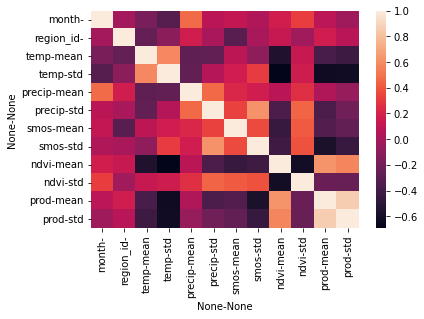

In [267]:
corr = mdf.corr()
print(corr)
sns.heatmap(corr)

I think I am going to build my model using ndvi mean and maybe smos std

# Model Selection

In [268]:
#master dateframe
mdf

month region_id       temp               precip                 smos  \
                          mean       std       mean        std      mean   
0       1        93  26.256897  2.018157   6.734694  18.279852  0.353934   
1       1        94  26.972671  2.580565   3.268981   7.199753  0.287318   
2       1        95  24.559012  2.213489   3.938500   9.549633  0.299561   
3       1        97  26.434009  2.050850   4.579071  11.634292  0.288773   
4       1        98  25.037878  1.818070   5.540595  15.509420  0.260478   
..    ...       ...        ...       ...        ...        ...       ...   
115    12        99  25.391773  1.899387   7.795105  10.345125  0.305141   
116    12       102  24.416637  1.816231   7.828808   7.079231  0.239864   
117    12       103  24.390960  1.569674   9.957920   6.537902  0.280612   
118    12       104  26.859436  2.187330   8.089943  11.115279  0.356754   
119    12       105  24.149071  2.159222  16.111508  26.129512  0.294033   

                   ndvi                     prod                
          std      mean       std           mean           std  
0    0.087390  0.779871  0.030583  214462.333333  51791.844581  
1    0.071689  0.778842  0.024704   18644.000000   4773.623990  
2    0.115140  0.779337  0.032202   17620.500000   6831.246468  
3    0.077646  0.789861  0.023220   42740.333333  14026.613500  
4    0.080449  0.804731  0.023028  177854.333333  54950.200548  
..        ...       ...       ...            ...           ...  
115  0.064335  0.811161  0.013547  136458.666667  14556.496799  
116  0.067192  0.815513  0.033805  419545.000000  71933.476857  
117  0.061611  0.808150  0.030107  322430.000000  21293.146851  
118  0.071910  0.773450  0.027748   35465.166667   6392.430286  
119  0.131528  0.765717  0.060873   40316.500000   5449.960211  

[120 rows x 12 columns]

In [269]:
#target dataframe
pp

,start_date,end_date,prod,region_id
0,2021-01-01 00:00:00+00:00,2021-01-31 00:00:00+00:00,NaN,93
1,2021-02-01 00:00:00+00:00,2021-02-28 00:00:00+00:00,NaN,93
2,2021-03-01 00:00:00+00:00,2021-03-31 00:00:00+00:00,NaN,93
3,2021-04-01 00:00:00+00:00,2021-04-30 00:00:00+00:00,NaN,93
4,2021-05-01 00:00:00+00:00,2021-05-31 00:00:00+00:00,NaN,93
...,...,...,...,...
115,2021-08-01 00:00:00+00:00,2021-08-31 00:00:00+00:00,NaN,105
116,2021-09-01 00:00:00+00:00,2021-09-30 00:00:00+00:00,NaN,105
117,2021-10-01 00:00:00+00:00,2021-10-31 00:00:00+00:00,NaN,105
118,2021-11-01 00:00:00+00:00,2021-11-30 00:00:00+00:00,NaN,105


In [270]:
mdf.iloc[:,10]

0      214462.333333
1       18644.000000
2       17620.500000
3       42740.333333
4      177854.333333
           ...      
115    136458.666667
116    419545.000000
117    322430.000000
118     35465.166667
119     40316.500000
Name: (prod, mean), Length: 120, dtype: float64

In [314]:
#target dataset which im including all variables at first
target = pd.DataFrame()

target['prodmean'] = mdf.iloc[:,10]
target['ndvimean'] = mdf.iloc[:,8]
target['ndvistd'] = mdf.iloc[:,9]
target['month'] = mdf.iloc[:,0]
target['region_id'] = mdf.iloc[:,1]
target['tempmean'] = mdf.iloc[:,2]
target['tempstd'] = mdf.iloc[:,3]
target['precipmean'] = mdf.iloc[:,4]
target['precipstd'] = mdf.iloc[:,5]
target['smosmean'] = mdf.iloc[:,6]
target['smosstd'] = mdf.iloc[:,7]
target['prodstd'] = mdf.iloc[:,11]
target

,prodmean,ndvimean,ndvistd,month,region_id,tempmean,tempstd,precipmean,precipstd,smosmean,smosstd,prodstd
0,214462.333333,0.779871,0.030583,1,93,26.256897,2.018157,6.734694,18.279852,0.353934,0.087390,51791.844581
1,18644.000000,0.778842,0.024704,1,94,26.972671,2.580565,3.268981,7.199753,0.287318,0.071689,4773.623990
2,17620.500000,0.779337,0.032202,1,95,24.559012,2.213489,3.938500,9.549633,0.299561,0.115140,6831.246468
3,42740.333333,0.789861,0.023220,1,97,26.434009,2.050850,4.579071,11.634292,0.288773,0.077646,14026.613500
4,177854.333333,0.804731,0.023028,1,98,25.037878,1.818070,5.540595,15.509420,0.260478,0.080449,54950.200548
...,...,...,...,...,...,...,...,...,...,...,...,...
115,136458.666667,0.811161,0.013547,12,99,25.391773,1.899387,7.795105,10.345125,0.305141,0.064335,14556.496799
116,419545.000000,0.815513,0.033805,12,102,24.416637,1.816231,7.828808,7.079231,0.239864,0.067192,71933.476857
117,322430.000000,0.808150,0.030107,12,103,24.390960,1.569674,9.957920,6.537902,0.280612,0.061611,21293.146851
118,35465.166667,0.773450,0.027748,12,104,26.859436,2.187330,8.089943,11.115279,0.356754,0.071910,6392.430286


In [316]:
target.corr()

,prodmean,ndvimean,ndvistd,month,region_id,tempmean,tempstd,precipmean,precipstd,smosmean,smosstd,prodstd
prodmean,1.000000,0.627765,-0.234984,9.061639e-02,1.685343e-01,-0.364366,-0.622381,0.046991,-0.349287,-0.322921,-0.567239,0.866821
ndvimean,0.627765,1.000000,-0.609509,1.761659e-01,1.370000e-01,-0.550660,-0.691375,0.085891,-0.353268,-0.446839,-0.412644,0.575880
ndvistd,-0.234984,-0.609509,1.000000,3.165675e-01,-1.357447e-02,0.135222,0.162633,0.266620,0.449566,0.415644,0.388533,-0.238506
month,0.090616,0.176166,0.316567,1.000000e+00,-1.912463e-15,-0.174595,-0.311729,0.475561,0.083277,0.118543,0.047955,-0.029222
region_id,0.168534,0.137000,-0.013574,-1.912463e-15,1.000000e+00,-0.249693,-0.093417,0.179558,0.013673,-0.299336,0.011743,0.076757
tempmean,-0.364366,-0.550660,0.135222,-1.745950e-01,-2.496934e-01,1.000000,0.579779,-0.273797,-0.263108,0.097391,-0.081690,-0.419236
tempstd,-0.622381,-0.691375,0.162633,-3.117293e-01,-9.341689e-02,0.579779,1.000000,-0.267633,0.062778,0.168652,0.310237,-0.612677
precipmean,0.046991,0.085891,0.266620,4.755611e-01,1.795576e-01,-0.273797,-0.267633,1.000000,0.469090,0.225086,0.170809,-0.052744
precipstd,-0.349287,-0.353268,0.449566,8.327693e-02,1.367333e-02,-0.263108,0.062778,0.469090,1.000000,0.339042,0.620005,-0.199782
smosmean,-0.322921,-0.446839,0.415644,1.185431e-01,-2.993358e-01,0.097391,0.168652,0.225086,0.339042,1.000000,0.365611,-0.267790


In [395]:
#Inputs for models
#target
Y = target['prodmean']
#features
X = target[['ndvimean']]

In [396]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
X_test=np.array(X_test)
X_test=np.array(X_test)
#X_train= X_train.reshape(-1, 1)
#y_train= y_train.reshape(-1, 1)
#x_test = x_test.reshape(-1, 1)

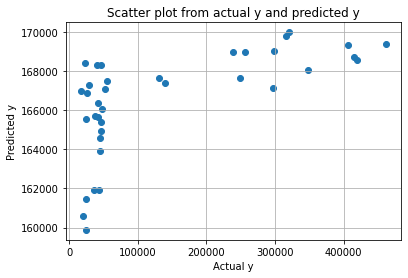

Mean Absolute percentage Error : 2.5672124273690247
Mean Absolute Error : 135433.9760677292
r2 score is : -0.005798152082940211


In [397]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#SGD Regressor
n_iter=1000
clf_ = SGDRegressor(max_iter=n_iter)
#clf = KNeighborsRegressor(n_neighbors=1)
#clf = LinearRegression()
clf_.fit(X_train.values, Y_train.values)

y_pred_sksgd=clf_.predict(X_test)
plt.scatter(Y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Absolute percentage Error :',mean_absolute_percentage_error(Y_test, y_pred_sksgd))
print('Mean Absolute Error :',mean_absolute_error(Y_test, y_pred_sksgd))
print('r2 score is :', r2_score(Y_test, y_pred_sksgd))
#print('y is:', Y_test)
#print('predicted was:', y_pred_sksgd)

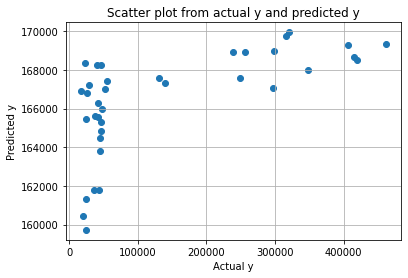

Mean Absolute percentage Error : 2.5655114922865474
Mean Absolute Error : 135389.825447161
r2 score is : -0.005341722361754009


In [398]:
clf = KNeighborsRegressor(n_neighbors=1)
#clf = LinearRegression()
clf_.fit(X_train.values, Y_train.values)

y_pred_sksgd=clf_.predict(X_test)
plt.scatter(Y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Absolute percentage Error :',mean_absolute_percentage_error(Y_test, y_pred_sksgd))
print('Mean Absolute Error :',mean_absolute_error(Y_test, y_pred_sksgd))
print('r2 score is :', r2_score(Y_test, y_pred_sksgd))
#print('y is:', Y_test)
#print('predicted was:', y_pred_sksgd)

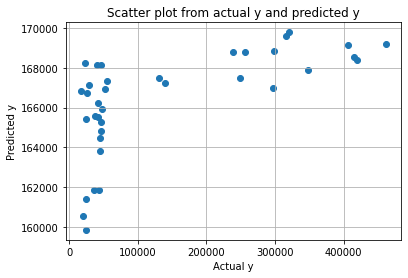

Mean Absolute percentage Error : 2.5651993732358185
Mean Absolute Error : 135410.16397033527
r2 score is : -0.005811100560992655


In [399]:
clf = LinearRegression()
clf_.fit(X_train.values, Y_train.values)

y_pred_sksgd=clf_.predict(X_test)
plt.scatter(Y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Absolute percentage Error :',mean_absolute_percentage_error(Y_test, y_pred_sksgd))
print('Mean Absolute Error :',mean_absolute_error(Y_test, y_pred_sksgd))
print('r2 score is :', r2_score(Y_test, y_pred_sksgd))
#print('y is:', Y_test)
#print('predicted was:', y_pred_sksgd)

In [400]:
#XGBoost regressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
scores = cross_val_score(XGBRegressor(objective='reg:squarederror'), X, Y, scoring='neg_mean_squared_error')
scores = (-scores)**.5
scores

array([ 82944.69714746, 132803.37219633, 148981.26841392, 118342.11948246,
       151417.23592582])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KernelRidge was fitted with feature names
  "X does not have valid feature names, but"


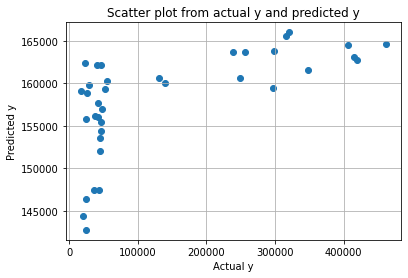

Mean Absolute percentage Error : 2.3792483515036307
Mean Absolute Error : 130648.43776900342
r2 score is : 0.038881312406767066
y is: 61      23701.500000
3       42740.333333
86     460989.166667
69      46528.166667
89      52639.333333
104    248939.166667
116    419545.000000
47     316424.500000
11      20053.833333
44     238209.333333
38      44946.166667
107    348343.000000
57     320040.000000
28      44207.833333
41      24023.000000
58      42639.666667
90     297020.333333
88      45544.333333
42      26676.333333
109     48454.333333
105    139587.500000
64     256412.833333
31      24468.000000
77     406078.500000
72      29724.666667
13      46956.500000
37     297836.166667
68      46108.000000
18      36343.500000
5      131000.833333
99      55461.000000
59      41199.500000
36     415091.833333
108     37787.833333
111     17833.166667
21      24817.666667
Name: prodmean, dtype: float64
predicted was: [162439.26723053 157664.0439697  164611.12464081 162162.02926937

In [401]:
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge(alpha=1.0)
krr.fit(X,Y)
y_pred_sksgd=krr.predict(X_test)
plt.scatter(Y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Absolute percentage Error :',mean_absolute_percentage_error(Y_test, y_pred_sksgd))
print('Mean Absolute Error :',mean_absolute_error(Y_test, y_pred_sksgd))
print('r2 score is :', r2_score(Y_test, y_pred_sksgd))
print('y is:', Y_test)
print('predicted was:', y_pred_sksgd)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


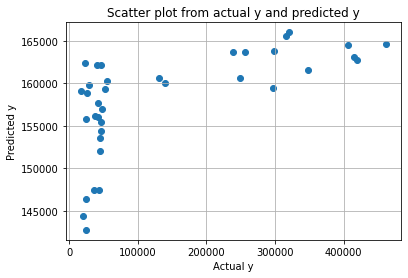

Mean Absolute percentage Error : 2.3792483515036307
Mean Absolute Error : 130648.43776900342
r2 score is : 0.038881312406767066
y is: 61      23701.500000
3       42740.333333
86     460989.166667
69      46528.166667
89      52639.333333
104    248939.166667
116    419545.000000
47     316424.500000
11      20053.833333
44     238209.333333
38      44946.166667
107    348343.000000
57     320040.000000
28      44207.833333
41      24023.000000
58      42639.666667
90     297020.333333
88      45544.333333
42      26676.333333
109     48454.333333
105    139587.500000
64     256412.833333
31      24468.000000
77     406078.500000
72      29724.666667
13      46956.500000
37     297836.166667
68      46108.000000
18      36343.500000
5      131000.833333
99      55461.000000
59      41199.500000
36     415091.833333
108     37787.833333
111     17833.166667
21      24817.666667
Name: prodmean, dtype: float64
predicted was: [162439.26723053 157664.0439697  164611.12464081 162162.02926937

In [402]:

from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, Y_train)
y_pred_gbr = reg.predict(X_test)
plt.scatter(Y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Absolute percentage Error :',mean_absolute_percentage_error(Y_test, y_pred_sksgd))
print('Mean Absolute Error :',mean_absolute_error(Y_test, y_pred_sksgd))
print('r2 score is :', r2_score(Y_test, y_pred_sksgd))
print('y is:', Y_test)
print('predicted was:', y_pred_sksgd)
